In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to database
conn = sqlite3.connect('seoul_bike.db')

In [3]:
# Overview of our db 
overview_query = """
SELECT 
    COUNT(DISTINCT timestamp) as collection_times,
    COUNT(DISTINCT station_id) as unique_stations,
    MIN(timestamp) as first_collection,
    MAX(timestamp) as last_collection,
    COUNT(*) as total_records
FROM bike_availability
"""

df_overview = pd.read_sql_query(overview_query, conn)
print("Data Collection Overview:")
print(df_overview)

Data Collection Overview:
   collection_times  unique_stations  first_collection   last_collection  \
0                58             2729  2025-07-25 18:17  2025-07-25 23:00   

   total_records  
0         158282  


In [6]:
# Querying for the busiest station (most bike movement)?
busy_stations_query = """
SELECT 
    station_id,
    AVG(available_bikes) as avg_bikes,
    MAX(available_bikes) - MIN(available_bikes) as bike_fluctuation,
    COUNT(*) as data_points
FROM bike_availability
GROUP BY station_id
HAVING bike_fluctuation > 10
ORDER BY bike_fluctuation DESC
LIMIT 20
"""
df_busy = pd.read_sql_query(busy_stations_query, conn)
print("Data for busiest station:")
print(df_busy)

Data for busiest station:
   station_id   avg_bikes  bike_fluctuation  data_points
0     ST-3094   48.034483                91           58
1      ST-891   37.724138                88           58
2     ST-2045  115.465517                87           58
3     ST-2031   35.172414                82           58
4      ST-997   71.948276                60           58
5     ST-2056   68.206897                58           58
6     ST-2007   33.413793                51           58
7     ST-2050   69.189655                49           58
8     ST-1995   23.241379                47           58
9     ST-1990   12.931034                46           58
10    ST-2013   37.258621                46           58
11    ST-2844   25.706897                46           58
12    ST-1645   82.724138                45           58
13      ST-18   19.206897                45           58
14    ST-2871   38.379310                45           58
15    ST-3311   48.431034                45           58
16   

In [7]:
# Querying for Time patterns - How does availability change over time?
time_pattern_query = """
SELECT 
    strftime('%H:%M', timestamp) as time_of_day,
    AVG(available_bikes) as avg_available_bikes,
    AVG(available_racks) as avg_available_racks
FROM bike_availability
GROUP BY time_of_day
ORDER BY time_of_day
"""
df_time_pattern = pd.read_sql_query(time_pattern_query, conn)
print("Checking how availability change over time:")
print(df_time_pattern)

Checking how availability change over time:
   time_of_day  avg_available_bikes  avg_available_racks
0        18:17            11.508245             0.533529
1        18:22            11.540491             0.501283
2        18:27            11.583730             0.458043
3        18:33            11.631733             0.410040
4        18:38            11.604984             0.436790
5        18:43            11.624038             0.417735
6        18:48            11.638329             0.403444
7        18:53            11.673873             0.367900
8        18:58            11.705020             0.336753
9        19:03            11.721143             0.320630
10       19:08            11.720044             0.321730
11       19:13            11.717479             0.324295
12       19:18            11.733602             0.308171
13       19:23            11.764016             0.277757
14       19:28            11.780139             0.261634
15       19:33            11.804324         

In [8]:
# Querying for Problem stations - Always empty or always full
problem_stations_query = """
SELECT 
    station_id,
    AVG(available_bikes) as avg_bikes,
    MIN(available_bikes) as min_bikes,
    MAX(available_bikes) as max_bikes,
    CASE 
        WHEN AVG(available_bikes) < 2 THEN 'Usually Empty'
        WHEN AVG(available_racks) < 2 THEN 'Usually Full'
        ELSE 'Normal'
    END as status
FROM bike_availability
GROUP BY station_id
HAVING status != 'Normal'
"""
df_problem_stations = pd.read_sql_query(problem_stations_query, conn)
print("Checking for problem stations:")
print(df_problem_stations)

Checking for problem stations:
     station_id  avg_bikes  min_bikes  max_bikes         status
0         ST-10   1.706897          0          6  Usually Empty
1       ST-1000  38.344828         31         49   Usually Full
2       ST-1002  15.482759          8         21   Usually Full
3       ST-1004   8.706897          6         12   Usually Full
4       ST-1005  43.206897         36         58   Usually Full
...         ...        ...        ...        ...            ...
1803     ST-992  19.465517         16         22   Usually Full
1804     ST-993  21.224138         18         24   Usually Full
1805     ST-995  10.362069          9         12   Usually Full
1806     ST-996   0.465517          0          2  Usually Empty
1807     ST-997  71.948276         42        102   Usually Full

[1808 rows x 5 columns]


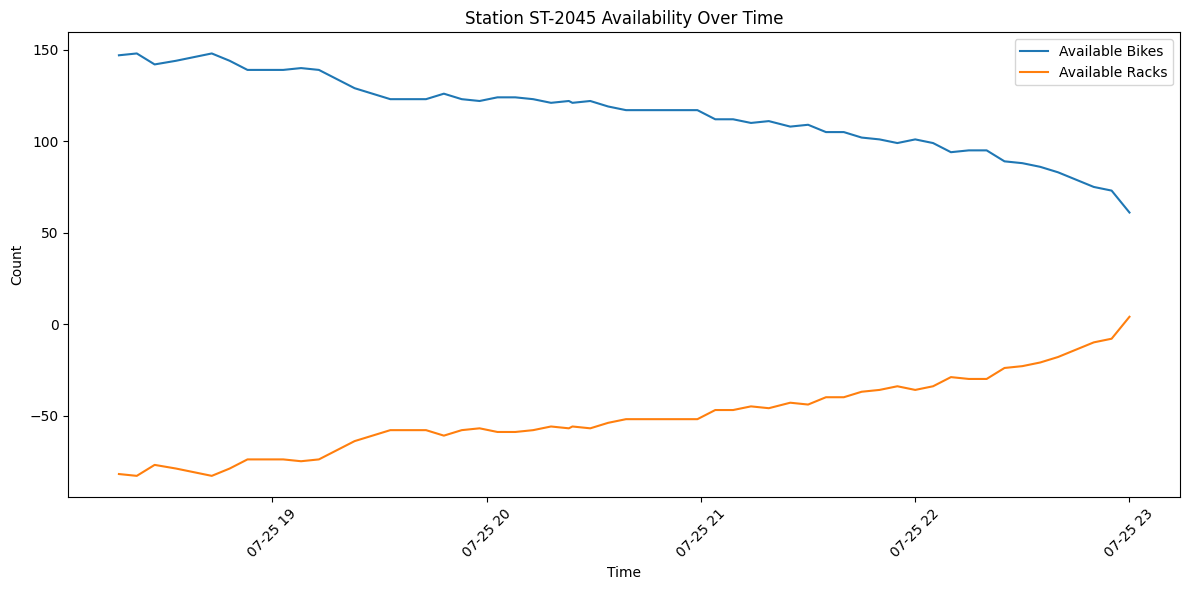

In [10]:
# Plot availability over time for a busy station
station_timeline_query = """
SELECT timestamp, available_bikes, available_racks
FROM bike_availability
WHERE station_id = 'ST-2045'  -- Replace with a busy station
ORDER BY timestamp
"""

df_timeline = pd.read_sql_query(station_timeline_query, conn)
df_timeline['timestamp'] = pd.to_datetime(df_timeline['timestamp'])

plt.figure(figsize=(12, 6))
plt.plot(df_timeline['timestamp'], df_timeline['available_bikes'], label='Available Bikes')
plt.plot(df_timeline['timestamp'], df_timeline['available_racks'], label='Available Racks')
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Station ST-2045 Availability Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()